In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sys import exit
import pandas as pd
import glob
import pickle
from textwrap import wrap
import time
import math
import scipy
import itertools
from scipy import signal## because scipy doesn't always load its submodules for some reason
from scipy import stats
from sklearn.metrics.cluster import adjusted_rand_score
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, pairwise_distances
from scipy.optimize import fsolve
import scipy.optimize
from scipy.stats import levy_stable
import sys
sys.path.append('/Users/ashish/Dropbox/research/James-research/city establishment data/')

import powerlaw
import shared_analysis_functions as shared_func
import importlib
importlib.reload(shared_func)
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance as scipy_spatial_distance

import warnings
# fit_params_path='/Users/ashish/Box/research/James/BLS data/processed_BLS_data/fit_parameters/'
# 
fontSize=12
fontSizeSmall=10
labelSize=8
sns.set(rc= {'figure.facecolor':'white'}) #'axes.facecolor':'cornflowerblue',

def create_color_list(scheme_name='sns_tab10',num_colors=6): 
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    #https://seaborn.pydata.org/tutorial/color_palettes.html
    if scheme_name.lower()=='tableau':
        color_list=list(mcolors.TABLEAU_COLORS.values())## only had 10 colors
    elif scheme_name.lower()=='css':
        color_list=list(mcolors.CSS4_COLORS.values())
    elif scheme_name.lower()=='base':
        color_list=list(mcolors.BASE_COLORS.values())
    elif scheme_name.lower()=='sns_tab10':
        color_list=list(sns.color_palette(palette='tab10',n_colors=num_colors))
    elif scheme_name.lower()=='sns_deep':
        color_list=list(sns.color_palette(palette='deep',n_colors=num_colors))
    elif scheme_name.lower()=='sns_muted':
        color_list=list(sns.color_palette(palette='muted',n_colors=num_colors))
    elif scheme_name.lower()=='sns_colorblind':
        color_list=list(sns.color_palette(palette='colorblind',n_colors=num_colors))
    elif scheme_name.lower()=='sns_spectral':
        color_list=list(sns.color_palette(palette='Spectral',n_colors=num_colors))
    else:
        print ('scheme not implemented')
    if 'sns' not in scheme_name.lower():
        color_list=[color for color in color_list if sum(mcolors.to_rgb(color))<2.5] ## remove white
        mcolors.to_rgb(color_list[0])
    return  color_list
color_list_def=create_color_list()


def compute_pairwise_distances(X, distance_metric):
    dist_bw_pwise=False ## compute distance again assuming pairwise distances are features. 
    if 'dist_bw_pwise_' in distance_metric:
        dist_bw_pwise=True
        distance_metric=distance_metric.replace('dist_bw_pwise_','')
    
    if distance_metric is 'jensenshannon':
        temp_Distances = scipy_spatial_distance.pdist(
            X, metric=distance_metric)
        Distances = scipy_spatial_distance.squareform(temp_Distances)
    else:
        Distances = pairwise_distances(X, metric=distance_metric)
        
    if dist_bw_pwise:
        Distance2=compute_pairwise_distances(Distances, distance_metric)
        return Distance2
    else:
        return Distances
    


def get_BCI_clust_logG(df_counts,clust_id ):
    df_clusti=df_counts[df_counts['height_cluster']==clust_id]
    BCI_popn=df_clusti[BCI_year_list].values
    BCI_fold_change=BCI_popn[:,1:]/BCI_popn[:,:-1]
    BCI_fold_change=np.ravel(BCI_fold_change[np.nonzero(BCI_popn[:,:-1])])
    BCI_logG_clusti=np.log(BCI_fold_change[BCI_fold_change>0])
    
    return BCI_logG_clusti



'''
figure size and font settings
'''   
## figure settings
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')

from matplotlib.ticker import MaxNLocator
my_locator = MaxNLocator(6)

# def figure_size_setting(WIDTH):
#     #WIDTH = 700.0  # the number latex spits out
#     FACTOR = 0.8  # the fraction of the width you'd like the figure to occupy
#     fig_width_pt  = WIDTH * FACTOR
#     inches_per_pt = 1.0 / 72.27
#     golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
#     fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
#     fig_height_in = fig_width_in * golden_ratio   # figure height in inches
#     fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list
#     return fig_dims

# time_stamp_arr=[]
# time_arr=[]
# t=0
# for y in np.arange(1990,2022):
#     for q in np.arange(1,5):
#         for m in np.arange(1,4):
#             time_stamp_arr.append('Y'+str(y)[-2:]+'-Q'+str(q)+'-M'+str(m))
#             time_arr.append(t)
#             t+=1
# time_stamp_arr=np.array(time_stamp_arr)
# time_arr=np.array(time_arr)

BCI_data_path='/Users/ashish/Box/research/James/BCI data/bci/'
BCI_processed_path='/Users/ashish/Box/research/James/BCI data/processed_BCI_data/'
fit_params_path='/Users/ashish/Box/research/James/BCI data/processed_BCI_data/fit_parameters/'

In /Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /User

# read and wrangle raw data

In [5]:

##cannot use 1985 census due to different flags and conditions
# ####pd.read_csv(BCI_data_path+'bci1.txt',encoding='ISO-8859–1',sep='\t')## 1985 census
df2=pd.read_csv(BCI_data_path+'bci2.txt',encoding='ISO-8859–1',sep='\t') ##1990
df3=pd.read_csv(BCI_data_path+'bci3.txt',encoding='ISO-8859–1',sep='\t')#95
df4=pd.read_csv(BCI_data_path+'bci4.txt',encoding='ISO-8859–1',sep='\t')#2000
df5=pd.read_csv(BCI_data_path+'bci5.txt',encoding='ISO-8859–1',sep='\t')#2005





In [8]:
df3.head(20)

,tag,sp,gx,gy,dbh,pom,date,codes,status
0,105951,ACACME,610.0,104.7,116.0,1,5256.0,M,A
1,132160,ACACME,534.8,241.3,91.0,1,5254.0,*,A
2,132234,ACACME,539.4,242.3,122.0,1,5254.0,M,A
3,132235,ACACME,538.8,242.5,141.0,3,5254.0,*,A
4,191542,ACACME,282.7,177.5,52.0,1,5202.0,*,A
5,269064,ACACME,84.2,74.8,21.0,1,5122.0,*,A
6,272540,ACACME,149.9,389.8,19.0,1,5186.0,*,A
7,422989,ACACME,450.8,216.8,14.0,1,5275.0,*,A
8,430127,ACACME,606.4,105.6,24.0,1,5256.0,*,A
9,430131,ACACME,606.1,103.1,15.0,1,5256.0,*,A


## make data frame with species counts in each year

In [60]:
species_list=np.sort(list(set(df2['sp'])))
## create empty target dataframe which we will fill with counts
df_counts={'sp':species_list,'Y1990':np.zeros(len(species_list)),
           'Y1995':np.zeros(len(species_list)),
           'Y2000':np.zeros(len(species_list)),
           'Y2005':np.zeros(len(species_list))}
df_counts = pd.DataFrame(df_counts )
year_list=['Y1990','Y1995','Y2000','Y2005']
for df,year in zip([df2,df3,df4,df5],year_list):
    for i,sp in enumerate(species_list):
        df_sub=df[df['sp']==sp]
        df_sub=df_sub[df_sub['status']=='A']
        df_sub=df_sub[df_sub['dbh']>=10]
        df_counts.loc[i, year]=len(df_sub.index)
df_counts.to_csv(BCI_processed_path+'df_counts.csv')        
        






## read and wrangle rafael cluster labels

In [2]:
cluster_file_name='/Users/ashish/Box/research/James/BCI data/rafael clustering/trait clustering 2020 paper/BCI_heightclusters.csv'
df_clust=pd.read_csv(cluster_file_name,encoding='ISO-8859–1')
df_clust.head()

,sp,abun,genus,species,maxheight,cluster
0,acacme,20,Acacia,melanoceras,10.608000,2
1,acaldi,263,Acalypha,diversifolia,6.260000,1
2,acalma,45,Acalypha,macrostachya,7.080000,1
3,ade1tr,82,Adelia,triloba,13.167500,2
4,aegipa,21,Aegiphila,panamensis,11.942916,2


In [16]:
print (len(df_clust))
print (len(df_clust[df_clust['cluster']==1]),len(df_clust[df_clust['cluster']==2]),
len(df_clust[df_clust['cluster']==3]),len(df_clust[df_clust['cluster']==4]) )

285
87 75 60 63


In [19]:
df_counts = pd.read_csv(
    BCI_processed_path+'df_counts.csv', index_col=0)

df_counts_with_clust=deepcopy(df_counts)

df_counts_with_clust['height_cluster']=-1*np.ones(len(df_counts_with_clust)).astype(int)
df_counts_with_clust['genus']=['x' for i in range(len(df_counts_with_clust) )]
df_counts_with_clust['species']=['x' for i in range(len(df_counts_with_clust) )]


for i in range(len(df_counts_with_clust['sp'])):
    
    if np.any( df_clust['sp']== df_counts_with_clust['sp'][i].lower()):
        clust_id=df_clust[df_clust['sp']== df_counts_with_clust['sp'][i].lower()]['cluster']
        df_counts_with_clust['height_cluster'].at[i]=clust_id   
        genus=clust_id=df_clust[df_clust['sp']== df_counts_with_clust['sp'][i].lower()]['genus'].values[0]
        df_counts_with_clust['genus'].at[i]=genus
        species=clust_id=df_clust[df_clust['sp']== df_counts_with_clust['sp'][i].lower()]['species'].values[0]
        df_counts_with_clust['species'].at[i]=species
        
#     else:
#         print (df_counts_with_clust.loc[i]) ## few low abundance species not clustered.


df_counts_with_clust.to_csv(BCI_processed_path+'df_counts_with_clust.csv')        


In [16]:
df_clust[df_clust['sp']== df_counts_with_clust['sp'][i].lower()]['genus'].values[0]

'Zuelania'

In [18]:
df_counts_with_clust.head()

,sp,Y1990,Y1995,Y2000,Y2005,height_cluster,genus,species
0,ACACME,11.0,12.0,10.0,22.0,2,Acacia,melanoceras
1,ACALDI,819.0,526.0,490.0,746.0,1,Acalypha,diversifolia
2,ACALMA,44.0,42.0,43.0,52.0,1,Acalypha,macrostachya
3,ADE1TR,280.0,219.0,163.0,142.0,2,Adelia,triloba
4,AEGIPA,92.0,77.0,62.0,44.0,2,Aegiphila,panamensis


# read and get abundance, log G

In [3]:
BCI_year_list=year_list=['Y1990','Y1995','Y2000','Y2005']

# df_counts = pd.read_csv(
#     BCI_processed_path+'df_counts.csv', index_col=0)
df_counts = pd.read_csv(
    BCI_processed_path+'df_counts_with_clust.csv', index_col=0)
popn=df_counts[year_list].values
fold_change=popn[:,1:]/popn[:,:-1]
fold_change=np.ravel(fold_change[np.nonzero(popn[:,:-1])])
logG=np.log(fold_change[fold_change>0])
n_BCI_clusts=4

/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [4]:
df_counts.head()

,sp,Y1990,Y1995,Y2000,Y2005,height_cluster,genus,species
0,ACACME,11.0,12.0,10.0,22.0,2,Acacia,melanoceras
1,ACALDI,819.0,526.0,490.0,746.0,1,Acalypha,diversifolia
2,ACALMA,44.0,42.0,43.0,52.0,1,Acalypha,macrostachya
3,ADE1TR,280.0,219.0,163.0,142.0,2,Adelia,triloba
4,AEGIPA,92.0,77.0,62.0,44.0,2,Aegiphila,panamensis


In [4]:
len(df_counts) ## 320 species exist 

320

In [12]:
df_temp=deepcopy(df_counts)
df_temp[df_temp['height_cluster']==4].sort_values(by=['Y1990']).tail(10)



,sp,Y1990,Y1995,Y2000,Y2005,height_cluster,genus,species
222,POUTRE,1766.0,1625.0,1400.0,1204.0,4,Pouteria,reticulata
305,VIROSE,2081.0,1861.0,1613.0,1394.0,4,Virola,sebifera
219,POULAR,2120.0,1774.0,1403.0,1162.0,4,Poulsenia,armata
85,DRYPST,2279.0,2239.0,2193.0,2180.0,4,Drypetes,standleyi
247,QUARAS,2347.0,2290.0,2200.0,2137.0,4,Quararibea,asterolepis
33,BEILPE,2748.0,2589.0,2319.0,2115.0,4,Beilschmiedi,pendula
281,TACHVE,3094.0,2947.0,2485.0,2234.0,4,Tachigali,versicolor
287,TET2PA,4116.0,4139.0,4230.0,4493.0,4,Tetragastris,panamensis
9,ALSEBL,8415.0,8177.0,7872.0,7754.0,4,Alseis,blackiana
296,TRI2TU,13294.0,12822.0,11983.0,11344.0,4,Trichilia,tuberculata


In [13]:
df_temp[df_temp['genus']=='Beilschmiedi']

,sp,Y1990,Y1995,Y2000,Y2005,height_cluster,genus,species
33,BEILPE,2748.0,2589.0,2319.0,2115.0,4,Beilschmiedi,pendula


In [8]:
df_counts[df_counts['height_cluster']==2]

,sp,Y1990,Y1995,Y2000,Y2005,height_cluster,genus,species
0,ACACME,11.0,12.0,10.0,22.0,2,Acacia,melanoceras
3,ADE1TR,280.0,219.0,163.0,142.0,2,Adelia,triloba
4,AEGIPA,92.0,77.0,62.0,44.0,2,Aegiphila,panamensis
8,ALLOPS,153.0,123.0,112.0,103.0,2,Allophylus,psilospermus
16,ANNOSP,143.0,177.0,134.0,123.0,2,Annona,spraguei
...,...,...,...,...,...,...,...,...
275,SWARS1,2575.0,2605.0,2670.0,2784.0,2,Swartzia,simplex_var.
276,SWARS2,2864.0,2876.0,2884.0,2926.0,2,Swartzia,simplex_var.
283,TALIPR,672.0,643.0,632.0,664.0,2,Talisia,princeps
291,TOCOPI,8.0,7.0,7.0,7.0,2,Tocoyena,pittieri


# Fit log G
- When just fitting logG, BDI does better than Laplace but not better than Weibull
- to the eye, BDI does a good job at fitting the abundance and growth rate distributions with one shape parameter
- abundance distribution needs to use Preston's method of binning to divide data on bin boundaries into nearby octaves..

## fit just log G and compare to other distributions

BDI does better than laplace, but not better than weibull

/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1833: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


fit parameters tp= 0.003603332552969507 , and m/D= 0.6934336736322417
AIC_BDI,AIC_laplace,AIC_weibull = -147.37726564003952 -41.20374047771307 -1155.076668617098
-1155.076668617098
weibull actually does the best


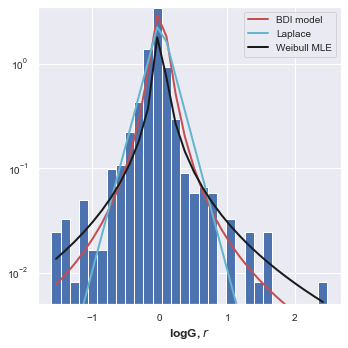

In [6]:
neutral_inst = shared_func.azaele_neutral_logG_distribution()
weibull_inst = shared_func.symmetric_weibull_gen() 

n_bins=30

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot()

weibull_k_MLE,_ , weibull_lambda_MLE=  weibull_inst.fit(logG,
                                                        .6, scale=.005, floc=0)
neut_tp, neut_bd, loc_neut, scale_neut = neutral_inst.fit(
        logG,10., 1., floc=0,fscale=1.)
_, scale_laplace=scipy.stats.laplace.fit(logG,floc=0,scale=.2)

logLik = np.sum( stats.laplace.logpdf(logG, loc=0,scale= scale_laplace ) ) 
AIC_laplace=2*1-2*logLik

logLik = np.sum( neutral_inst.logpdf(logG, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut ) ) 
AIC_BDI=2*2-2*logLik

logLik = np.sum( weibull_inst.logpdf(logG, weibull_k_MLE,
                    loc=0,scale= weibull_lambda_MLE ) ) 
AIC_weibull=2*2-2*logLik

histogram, bins = np.histogram(logG, bins=n_bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax1.hist(logG, bins=n_bins, density=True)

ax1.plot(bin_centers, neutral_inst.pdf(bin_centers, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut),
         'r-',lw=2,label='BDI model') 
ax1.plot(bin_centers,scipy.stats.laplace.pdf(bin_centers,loc=0,scale=scale_laplace),
                         'c-',lw=2,label='Laplace')
ax1.plot(bin_centers,weibull_inst.pdf(bin_centers,weibull_k_MLE,
                    loc=0,scale= weibull_lambda_MLE), 'k-',lw=2,label='Weibull MLE')
ax1.set_xlabel(r'logG, $r$')
ax1.set_yscale('log')
ax1.set_ylim(5e-3,3.5)
ax1.legend(loc='best')

print('fit parameters tp=',neut_tp,', and m/D=',neut_bd)

print('AIC_BDI,AIC_laplace,AIC_weibull =',AIC_BDI,AIC_laplace,AIC_weibull)
print (min ([AIC_BDI,AIC_laplace,AIC_weibull]))
print ('weibull actually does the best')
fig.tight_layout()

results_fit={'m/D_logG':neut_bd,'tp':neut_tp}   

with open(fit_params_path+'fit_logG_-fitvals.pkl', 'wb') as handle:
    pickle.dump(results_fit, handle)  

## fit log g and abundance

/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


shared shape (from abundance) was  0.30010465489668214


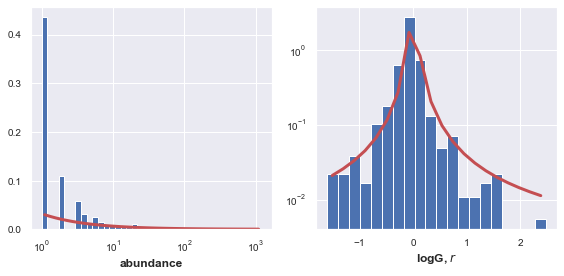

In [8]:
neutral_inst = shared_func.azaele_neutral_logG_distribution()
n_bins=20
popn_1995=popn[:,1]
popn_1995=popn_1995[popn_1995>0]
a_gamma,dummy_loc_gamma, scale_gamma=scipy.stats.gamma.fit(
                            popn_1995, 1.,floc=0.,scale=2 )
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# histogram, bins = np.histogram(popn_1995, bins=n_bins, density=True)
# bin_centers = 0.5*(bins[1:] + bins[:-1])
# ax1.hist(popn_1995,density=True, bins=n_bins)
# ax1.plot(bin_centers, scipy.stats.gamma.pdf(bin_centers,
#                             a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3)
# bins_abu=np.logspace(np.log10(1),np.log10(5e5),40 )
bins_abu=np.logspace(np.log10(1),np.log10(1200),40 )
histogram, bins = np.histogram(popn_1995, bins=bins_abu, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax1.hist(popn_1995,density=True, bins=bins_abu)
ax1.plot(bin_centers, scipy.stats.gamma.pdf(bin_centers,
                            a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3)
# ax1.hist(popn_1995,density=True, bins=np.logspace(np.log10(1),np.log10(5e5),20 ))
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel('abundance')


neut_tp, neut_bd, loc_neut, scale_neut = neutral_inst.fit(
        logG,10., fbd=a_gamma, floc=0,fscale=1.)
histogram, bins = np.histogram(logG, bins=n_bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax2.hist(logG, bins=n_bins, density=True)

ax2.plot(bin_centers, neutral_inst.pdf(bin_centers, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut),
         'r-',lw=3,label='BDI model') 
ax2.set_xlabel(r'logG, $r$')
ax2.set_yscale('log')
fig.tight_layout()

print('shared shape (from abundance) was ', neut_bd)


results_fit={'m/D_AFD':a_gamma,'tp':neut_tp,'Dtau':scale_gamma}   

with open(fit_params_path+'fit_logG_with_AFD-fitvals.pkl', 'wb') as handle:
    pickle.dump(results_fit, handle) 

### Preston's method of binning abundances
- unfinished. Started because Azaele paper used this method to split values on bin boundaries to either side and smoothen then empirical distribution
- Further, Azaele et al plotted the best fit to the empirical histogram, not the maximum likelihood fit.

In [63]:
bins=np.exp2(np.arange(0,17)).astype(int)
# popn_int=np.array(popn[:,0]).astype(int)
popn_int=np.array(popn[:,1]).astype(int)
elem, count_elem=np.unique(popn_int, return_counts = True)

count_arr=np.zeros_like(bins)

for i,bin_st in enumerate(bins[:-1]):
    bin_end=bins[i+1]
    
    count=0
    
    idx_st
    print (i)
    if np.any(elem==bin_st):
        idx_st=np.where(elem==bin_st)[0][0]
        count=count+count_elem[idx_st]/2
        print ('st=',idx_st,elem[idx_st])
    if np.any(elem==bin_end):
        idx_end=np.where(elem==bin_end)[0][0]
        count=count+count_elem[idx_end]/2
        print ('end=',idx_end,elem[idx_end])
    idx_st=np.where(elem>bin_st)[0][0]
    idx_end=np.where(elem<bin_end)[0][-1]
#     print('count1is' ,count)
    if idx_end>idx_st:
        count=count+np.sum(count_elem[idx_st:idx_end+1])
        print (idx_st,idx_end)
        print (elem[idx_st], elem[idx_end])
    
#     print('count2is' ,count)  
    count_arr[i]=count
    if i>3:
        break
    
    
    
    


0
st= 1 1
end= 2 2
1
st= 2 2
end= 4 4
2
st= 4 4
end= 8 8
5 7
5 7
3
st= 8 8
end= 14 16
9 13
9 15
4
st= 14 16
15 25
17 31


In [64]:
count_arr

array([16,  8, 19, 15, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [57]:
count_elem[0:2]

array([23, 10])

In [48]:
np.where(elem>bin_st)

(array([197]),)

In [51]:
elem[0:1]

array([1])

In [47]:
elem

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          11,    12,    13,    15,    16,    17,    19,    20,    21,
          22,    23,    25,    27,    29,    30,    31,    33,    34,
          37,    38,    39,    40,    42,    43,    48,    49,    50,
          52,    53,    54,    57,    60,    63,    64,    65,    68,
          70,    71,    73,    75,    77,    78,    79,    80,    82,
          84,    86,    87,    88,    91,    92,    99,   103,   105,
         106,   108,   110,   112,   113,   114,   116,   117,   121,
         123,   128,   132,   134,   138,   139,   140,   144,   154,
         156,   168,   170,   172,   174,   176,   177,   180,   186,
         204,   205,   208,   213,   216,   219,   226,   228,   251,
         255,   257,   258,   268,   274,   278,   291,   293,   300,
         301,   307,   312,   324,   339,   340,   373,   374,   377,
         378,   394,   395,   396,   404,   448,   456,   474,   526,
         528,   533,

In [45]:
count

array([23, 10,  9,  6,  3,  7,  5,  3,  4,  3,  2,  3,  1,  1,  3,  2,  3,
        5,  3,  1,  2,  2,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  4,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,
        2,  2,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [37]:
bins

array([1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04,
       3.2768e+04, 6.5536e+04])

##### fit separately without shape being shared

/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


the two separate shape parameters were 0.30010465489668214 0.6934336736322417


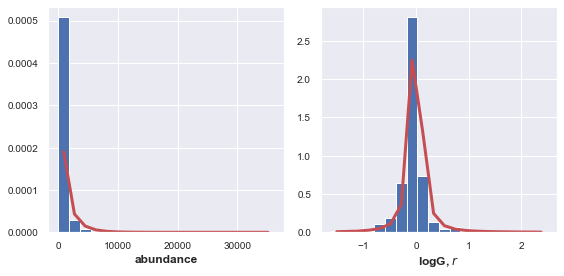

In [18]:
neutral_inst = shared_func.azaele_neutral_logG_distribution()
n_bins=20
popn_1995=popn[:,1]
popn_1995=popn_1995[popn_1995>0]
a_gamma,dummy_loc_gamma, scale_gamma=scipy.stats.gamma.fit(
                            popn_1995, 1.,floc=0.,scale=2 )
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

histogram, bins = np.histogram(popn_1995, bins=n_bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax1.hist(popn_1995,density=True, bins=n_bins)
ax1.plot(bin_centers, scipy.stats.gamma.pdf(bin_centers,
                            a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3)
         

# ax1.hist(popn_1995,density=True, bins=np.logspace(np.log10(1),np.log10(5e5),20 ))

# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel('abundance')


neut_tp, neut_bd, loc_neut, scale_neut = neutral_inst.fit(
        logG,10., 1., floc=0,fscale=1.)
histogram, bins = np.histogram(logG, bins=n_bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax2.hist(logG, bins=n_bins, density=True)

ax2.plot(bin_centers, neutral_inst.pdf(bin_centers, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut),
         'r-',lw=3,label='BDI model') 
ax2.set_xlabel(r'logG, $r$')
fig.tight_layout()

print('the two separate shape parameters were', a_gamma,neut_bd)

In [13]:
len(popn_1995)

320

##### plot

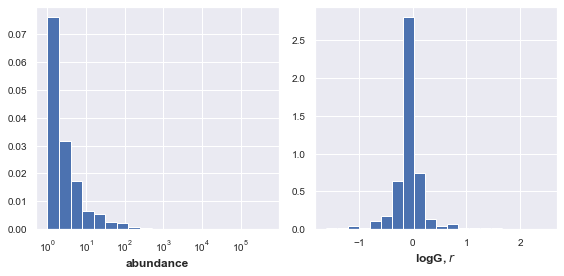

In [109]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(popn[:,1],density=True, bins=np.logspace(np.log10(1),np.log10(5e5),20 ))
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel('abundance')
ax2.hist(logG,density=True, bins=20)
ax2.set_xlabel(r'logG, $r$')
fig.tight_layout()

In [104]:
np.max(popn[:,1])

36060.0

In [102]:
np.logspace(np.log10(1),np.log10(5e5),10 )

array([1.00000000e+00, 4.29752973e+00, 1.84687617e+01, 7.93700526e+01,
       3.41095160e+02, 1.46586659e+03, 6.29960525e+03, 2.70727408e+04,
       1.16345908e+05, 5.00000000e+05])

In [64]:
df_sub.head()

,tag,sp,gx,gy,dbh,pom,date,codes,status
368044,213,ZUELGU,970.6,162.9,481.0,1,9028.0,*,A
368046,5196,ZUELGU,383.7,250.8,323.0,1,8876.0,*,A
368049,10584,ZUELGU,979.0,229.6,207.0,1,9029.0,*,A
368050,11071,ZUELGU,977.7,264.0,164.0,1,9030.0,*,A
368072,121802,ZUELGU,557.9,218.0,207.0,1,8926.0,*,A


In [65]:
df_counts.head()

,sp,Y1990,Y1995,Y2000,Y2005
0,ACACME,11.0,12.0,10.0,22.0
1,ACALDI,819.0,526.0,490.0,746.0
2,ACALMA,44.0,42.0,43.0,52.0
3,ADE1TR,280.0,219.0,163.0,142.0
4,AEGIPA,92.0,77.0,62.0,44.0


#### some basic checks 

In [27]:
#check if same species are mentioned in each file.
species_list=list(set(df2['sp']))
ctr=0
for df in [df2,df3,df4,df5]:
    temp_sp_list=list(set(df['sp']))
    if len(temp_sp_list)!=len(species_list):
        print (ctr)
        print (len(temp_sp_list),len(species_list))
        
    intersect_list=list(set(temp_sp_list) & set(species_list))
    print(len(intersect_list))
    ctr+=1

320
320
320
320


In [19]:
###finding which file is which census by looking at dates

a=df1['date'].values
a=a[~np.isnan(a)]
print (np.min(a), np.max(a))


a=df2['date'].values
a=a[~np.isnan(a)]
print (np.min(a), np.max(a))


a=df3['date'].values
a=a[~np.isnan(a)]
print (np.min(a), np.max(a))

a=df4['date'].values
a=a[~np.isnan(a)]
print (np.min(a), np.max(a))

a=df5['date'].values
a=a[~np.isnan(a)]
print (np.min(a), np.max(a))

1465.0 1738.0
3323.0 4355.0
5114.0 5523.0
6941.0 7394.0
8768.0 9154.0


# fit logG of species clusters

/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide


cluster 1
ll BDI -89.33081305265569 , ll normal -128.7991917889645 , ll laplace -86.1238148490946
tp, bd= 0.012762953546702642 0.8006774838312702
cluster 2
ll BDI 103.09857973034929 , ll normal 76.63279101304218 , ll laplace 106.91169294694441
tp, bd= 0.0060625697828357965 1.2278571845693862


/Users/ashish/anaconda3/envs/cities/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide


cluster 3
ll BDI 67.39596554343784 , ll normal -26.65955941215525 , ll laplace 53.042905601983435
tp, bd= 0.004708126081734841 0.9945006307769695
cluster 4
ll BDI 72.24197785659562 , ll normal 27.724193863470802 , ll laplace 67.43132224955399
tp, bd= 0.006052209650657484 1.132951916369248


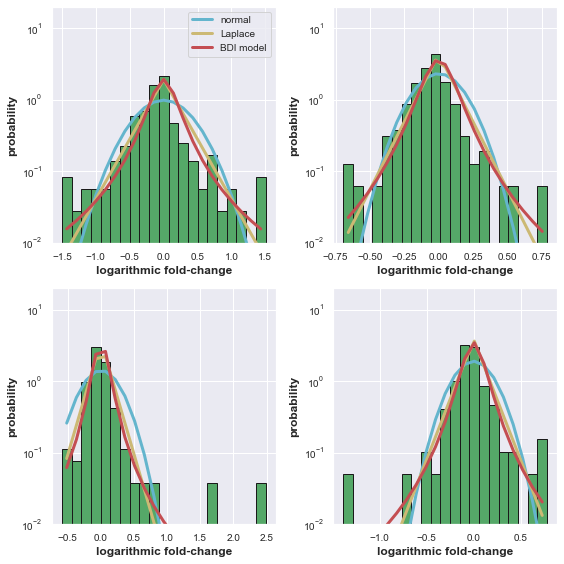

In [68]:
neutral_inst = shared_func.azaele_neutral_logG_distribution()
# weibull_inst = shared_func.symmetric_weibull_gen() 
dest_path='/Users/ashish/Dropbox/research/James-research/BDI manuscript/figures/fig1_growth_distribution/'
n_bins=21

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax_list=[ax1,ax2,ax3,ax4]

for clust_id in range(1,n_BCI_clusts+1):  
    ax=ax_list[clust_id-1]
    BCI_logG_clusti=get_BCI_clust_logG(df_counts,clust_id)   
    neut_tp, neut_bd, loc_neut, scale_neut = neutral_inst.fit(
            BCI_logG_clusti,10., 1., floc=0,fscale=1.)
    
    ll_BDI=np.sum(neutral_inst.logpdf(BCI_logG_clusti,  neut_tp, neut_bd, loc=0,scale=1.))
    mu, sigma=scipy.stats.norm.fit(BCI_logG_clusti,floc=0)
    ll_normal=np.sum(scipy.stats.norm.logpdf(BCI_logG_clusti,loc=mu,scale=sigma))
    loc_laplace, scale_laplace=scipy.stats.laplace.fit(BCI_logG_clusti,floc=0)
    ll_laplace=np.sum(scipy.stats.laplace.logpdf(BCI_logG_clusti,loc=loc_laplace,scale=scale_laplace))
    histogram, bins = np.histogram(BCI_logG_clusti, bins=n_bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    ax.hist(BCI_logG_clusti, bins=n_bins, density=True,facecolor='g',edgecolor='k')
    ax.plot(bin_centers, scipy.stats.norm.pdf(bin_centers,loc=mu,scale=sigma),
            'c-',lw=3,label='normal') 
    ax.plot(bin_centers, scipy.stats.laplace.pdf(bin_centers,loc=loc_laplace,scale=scale_laplace),
            'y-',lw=3,label='Laplace') 
    ax.plot(bin_centers, neutral_inst.pdf(bin_centers, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut),
             'r-',lw=3,label='BDI model') 

    ax.set_ylim(1e-2,20) 
    
    print ('cluster', clust_id)
    print('ll BDI', ll_BDI,', ll normal', ll_normal,', ll laplace', ll_laplace)
    print('tp, bd=', neut_tp,neut_bd)
for ax in ax_list:
    ax.set_xlabel(r'logarithmic fold-change')
    ax.set_yscale('log')
    ax.set_ylabel(r'probability')
#     ax.set_ylim(5e-3,3.5) /
ax1.legend(loc='best')

# ax1.set_title('microbiome')
# 
# ax3.set_title('urban employment')
# ax.set_title('tropical forest')
# plt.tick_params(axis='both', which='both') 
fig.patch.set_facecolor('white')  
fig.tight_layout()

# plt.savefig(dest_path+'BCI.png')
plt.show()

# fit AFD of species groups

In [57]:
BCI_year_list

['Y1990', 'Y1995', 'Y2000', 'Y2005']

fit vals= 0.2478811653855468 2635.9033917782217
fit vals= 0.34524596301014454 2860.414812837794
fit vals= 0.4785116256333881 922.8615906990148
fit vals= 0.39678952979696863 2037.3441451705396


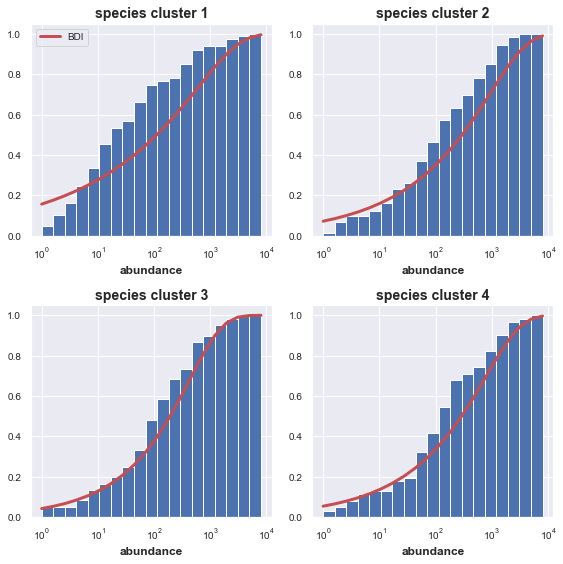

In [75]:

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax_list=[ax1,ax2,ax3,ax4]

for clust_id in range(1,n_BCI_clusts+1):  
    ax=ax_list[clust_id-1]
    
    clust_popn_1995=df_counts[df_counts['height_cluster']==clust_id]['Y2005']
    clust_popn_1995=clust_popn_1995[clust_popn_1995>0] 
    a_gamma,dummy_loc_gamma, scale_gamma=scipy.stats.gamma.fit(
                            clust_popn_1995, 1.,floc=0.,scale=2 )
    
    ll_BDI=np.sum(scipy.stats.gamma.logpdf(clust_popn_1995,  a_gamma, loc=dummy_loc_gamma,
                                           scale=scale_gamma))
    
    bins_abu=np.logspace(np.log10(1),np.log10(8000),20 )
#     bins_abu=20
    histogram, bins = np.histogram(clust_popn_1995, bins=bins_abu, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    ax.hist(clust_popn_1995,density=True, bins=bins_abu, cumulative=True)
#     ax.plot(bin_centers, scipy.stats.gamma.cdf(bin_centers,
#                                 a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3,label='BDI')
    
    ax.plot(bins_abu, scipy.stats.gamma.cdf(bins_abu,
                                a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3,label='BDI')
    
    ax.set_xscale('log')
    ax.set_xlabel('abundance')
    ax.set_title('species cluster '+str(clust_id))
    print('fit vals=', a_gamma, scale_gamma)
    

ax1.legend(loc='best')

fig.patch.set_facecolor('white')  
fig.tight_layout()


plt.show()

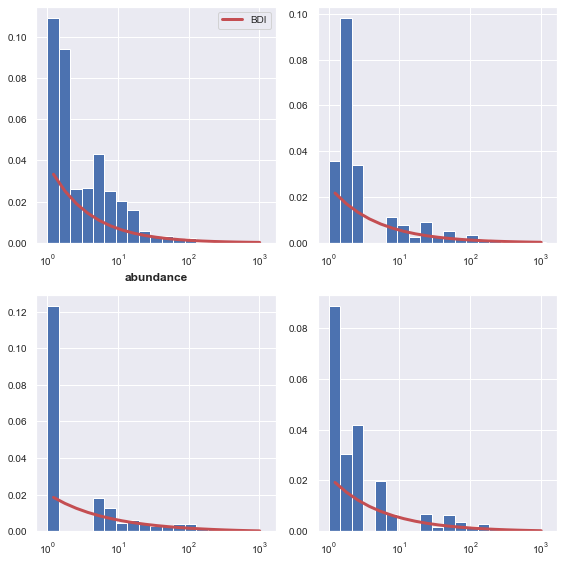

In [59]:

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax_list=[ax1,ax2,ax3,ax4]

for clust_id in range(1,n_BCI_clusts+1):  
    ax=ax_list[clust_id-1]
    
    popn_1995=df_counts[df_counts['height_cluster']==clust_id]['Y2005']
    popn_1995=popn_1995[popn_1995>0] 
    a_gamma,dummy_loc_gamma, scale_gamma=scipy.stats.gamma.fit(
                            popn_1995, 1.,floc=0.,scale=2 )
    
    ll_BDI=np.sum(scipy.stats.gamma.logpdf(popn_1995,  a_gamma, loc=dummy_loc_gamma,
                                           scale=scale_gamma))
    
    bins_abu=np.logspace(np.log10(1),np.log10(1200),20 )
    histogram, bins = np.histogram(popn_1995, bins=bins_abu, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    ax.hist(popn_1995,density=True, bins=bins_abu)
    ax.plot(bin_centers, scipy.stats.gamma.pdf(bin_centers,
                                a_gamma,loc=0.,scale=scale_gamma),'r-',lw=3,label='BDI')
    
    ax.set_xscale('log')
    ax1.set_xlabel('abundance')
    
    
    
#     mu, sigma=scipy.stats.norm.fit(BCI_logG_clusti,floc=0)
#     ll_normal=np.sum(scipy.stats.norm.logpdf(BCI_logG_clusti,loc=mu,scale=sigma))
#     loc_laplace, scale_laplace=scipy.stats.laplace.fit(BCI_logG_clusti,floc=0)
#     ll_laplace=np.sum(scipy.stats.laplace.logpdf(BCI_logG_clusti,loc=loc_laplace,scale=scale_laplace))
#     histogram, bins = np.histogram(BCI_logG_clusti, bins=n_bins, density=True)
#     bin_centers = 0.5*(bins[1:] + bins[:-1])
#     ax.hist(BCI_logG_clusti, bins=n_bins, density=True,facecolor='g',edgecolor='k')
#     ax.plot(bin_centers, scipy.stats.norm.pdf(bin_centers,loc=mu,scale=sigma),
#             'c-',lw=3,label='normal') 
#     ax.plot(bin_centers, scipy.stats.laplace.pdf(bin_centers,loc=loc_laplace,scale=scale_laplace),
#             'y-',lw=3,label='Laplace') 
#     ax.plot(bin_centers, neutral_inst.pdf(bin_centers, neut_tp, neut_bd, loc=loc_neut,scale= scale_neut),
#              'r-',lw=3,label='BDI model') 

#     ax.set_ylim(1e-2,20) 
    
#     print ('cluster', clust_id)
#     print('ll BDI', ll_BDI,', ll normal', ll_normal,', ll laplace', ll_laplace)

# for ax in ax_list:
#     ax.set_xlabel(r'log abundance')

#     ax.set_ylabel(r'probability')
#     ax.set_ylim(5e-3,3.5) /
ax1.legend(loc='best')

# ax1.set_title('microbiome')
# 
# ax3.set_title('urban employment')
# ax.set_title('tropical forest')
# plt.tick_params(axis='both', which='both') 
fig.patch.set_facecolor('white')  
fig.tight_layout()

# plt.savefig(dest_path+'BCI.png')
plt.show()

# Taylor's law

In [3]:
len(popn)

320

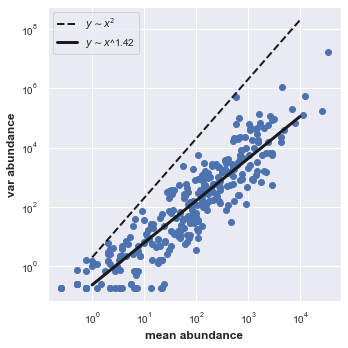

In [19]:
mean_list=[]
var_list=[]
for sp in range(len(popn)):
    if np.mean(popn[sp])>0 and np.var(popn[sp])>0: ## avoid zero abundance or variance species
        mean_list.append(np.mean(popn[sp]))
        var_list.append(np.var(popn[sp]))
        
        
        
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot()


# ax1.plot(mean_list, var_list,'o')
# ax1.set_xlabel('mean abundance')
# ax1.set_ylabel('var abundance')
xdummy=np.linspace(1e0, 1e4,5)   
ax1.loglog(mean_list, var_list,'o')
fit_result = scipy.stats.linregress(np.log10(mean_list), np.log10(var_list))
ax1.plot(xdummy,2*xdummy**2, 'k--', lw=2, label=r'$y \sim x^2$')

ax1.plot(xdummy,(10.**fit_result.intercept)*(xdummy**fit_result.slope), 'k-',
         lw=3, label=r'$y \sim x$^'+ '{:.2f}'.format(fit_result.slope))

ax1.legend(loc='best')
ax1.set_xlabel('mean abundance')
ax1.set_ylabel('var abundance')

fig.tight_layout()


             
